COLLABORATIVE FILTERING BASED

In [248]:
import numpy as np
import pandas as pd

In [249]:
mr=pd.read_csv('movies.csv')
rr=pd.read_csv('ratings.csv')

In [250]:
mr.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [251]:
rr.head()

userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523

In [252]:
mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [253]:
rr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [254]:
mr.title=mr.title.str[:-7]
mr.head()

movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [255]:
rr=rr.merge(mr,on="movieId")
rr.head()

userId  movieId  rating   timestamp   title       genres
0       1       16     4.0  1217897793  Casino  Crime|Drama
1       9       16     4.0   842686699  Casino  Crime|Drama
2      12       16     1.5  1144396284  Casino  Crime|Drama
3      24       16     4.0   963468757  Casino  Crime|Drama
4      29       16     3.0   836820223  Casino  Crime|Drama

In [256]:
rr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
 4   title      105339 non-null  object 
 5   genres     105339 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ MB


In [257]:
rr=rr.drop(['timestamp','movieId','genres'],axis=1)
rr.head()

userId  rating   title
0       1     4.0  Casino
1       9     4.0  Casino
2      12     1.5  Casino
3      24     4.0  Casino
4      29     3.0  Casino

In [258]:
rr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   userId  105339 non-null  int64  
 1   rating  105339 non-null  float64
 2   title   105339 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [259]:
rr.drop_duplicates(inplace=True)
rr.shape

(105207, 3)

In [260]:
rc=rr.groupby(['rating']).count().reset_index()
rc

rating  userId  title
0     0.5    1196   1196
1     1.0    3258   3258
2     1.5    1567   1567
3     2.0    7937   7937
4     2.5    5478   5478
5     3.0   21693  21693
6     3.5   12220  12220
7     4.0   28845  28845
8     4.5    8175   8175
9     5.0   14838  14838

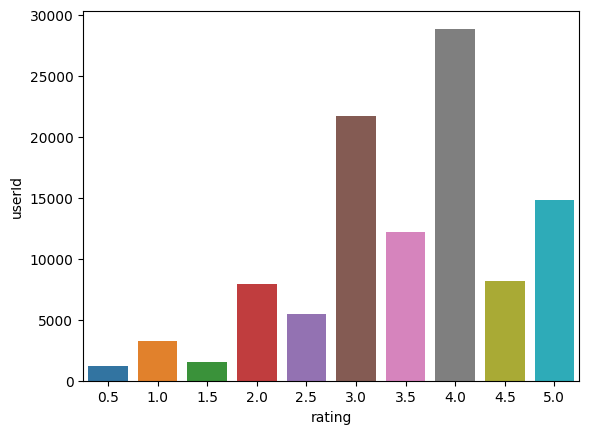

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=rc['rating'],y=rc['userId'])
plt.show()

In [262]:
rc=rr.groupby(['userId']).count().reset_index()
rc

userId  rating  title
0         1     113    113
1         2      29     29
2         3      73     73
3         4     124    124
4         5      68     68
..      ...     ...    ...
663     664      74     74
664     665     227    227
665     666     225    225
666     667      74     74
667     668    5656   5656

[668 rows x 3 columns]

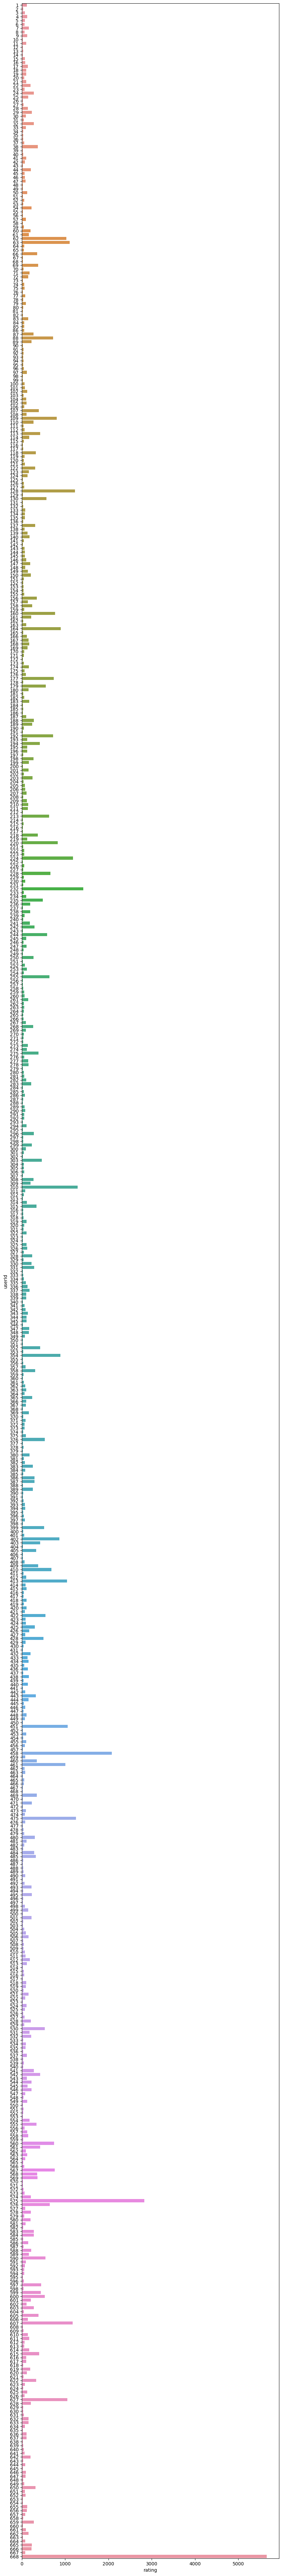

In [263]:
plt.figure(figsize=(10,100))
sns.barplot(x=rc['rating'],y=rc['userId'],orient = "h")
plt.show()

In [264]:
rc.head()

userId  rating  title
0       1     113    113
1       2      29     29
2       3      73     73
3       4     124    124
4       5      68     68

In [265]:
rc['rating'].max() # maximum number of ratings a user has given

5656

In [266]:
rc['rating'].min() # maximum number of ratings a user has given

20

In [267]:
print("Mean:",rc['rating'].mean()) #  average number of ratings given by users
print("Median:",rc['rating'].median()) 
print("Mode:",rc['rating'].mode()) 

Mean: 157.49550898203591
Median: 70.5
Mode: 0    20
Name: rating, dtype: int64


In [268]:
x=rr.groupby('userId').count()['rating']>70
p=x[x].index
rn=rr[rr['userId'].isin(p)]
rn.shape

(92212, 3)

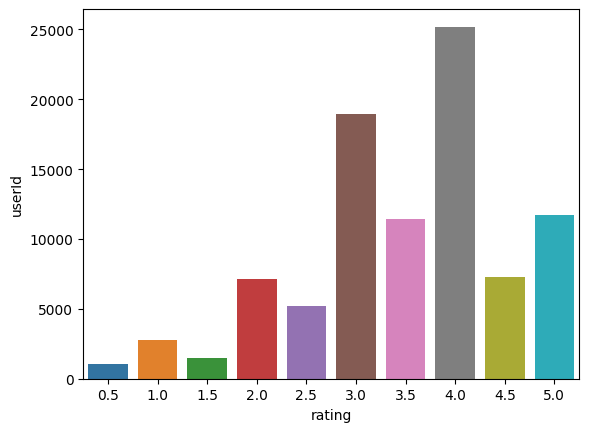

In [269]:
rc=rn.groupby(['rating']).count().reset_index()
sns.barplot(x=rc['rating'],y=rc['userId'])
plt.show()

In [270]:
rc=rr.groupby(['title']).count().reset_index()
rc

title  userId  rating
0                                         '71       1       1
1            'Hellboy': The Seeds of Creation       1       1
2                             'Round Midnight       1       1
3                          'Til There Was You       3       3
4                                 'burbs, The      20      20
...                                       ...     ...     ...
10002  loudQUIETloud: A Film About the Pixies       1       1
10003                                     xXx      24      24
10004                 xXx: State of the Union       7       7
10005                          ¡Three Amigos!      40      40
10006      À nous la liberté (Freedom for Us)       1       1

[10007 rows x 3 columns]

In [271]:
# plt.figure(figsize=(10,100))
# sns.barplot(x=rc['rating'],y=rc['title'],orient = "h")
# plt.show()

In [272]:
rc['rating'].max() # maximum number of ratings a movie has got

325

In [273]:
rc['rating'].min() # minimum number of ratings a movie has got

1

In [274]:
print("Mean:",rc['rating'].mean()) # average number of ratings the movies have got
print("Median:",rc['rating'].median()) 
print("Mode:",rc['rating'].mode()) 

Mean: 10.513340661536924
Median: 3.0
Mode: 0    1
Name: rating, dtype: int64


In [275]:
y=rn.groupby('title').count()['rating']>=10
f=y[y].index
rnew=rn[rn['title'].isin(f)]
rnew.shape

(71653, 3)

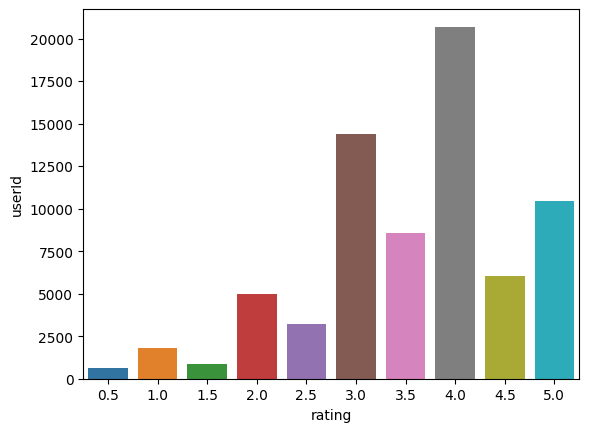

In [276]:
rc=rnew.groupby(['rating']).count().reset_index()
sns.barplot(x=rc['rating'],y=rc['userId'])
plt.show()

In [277]:
rnew.head()

userId  rating   title
0       1     4.0  Casino
1       9     4.0  Casino
3      24     4.0  Casino
4      29     3.0  Casino
6      47     4.0  Casino

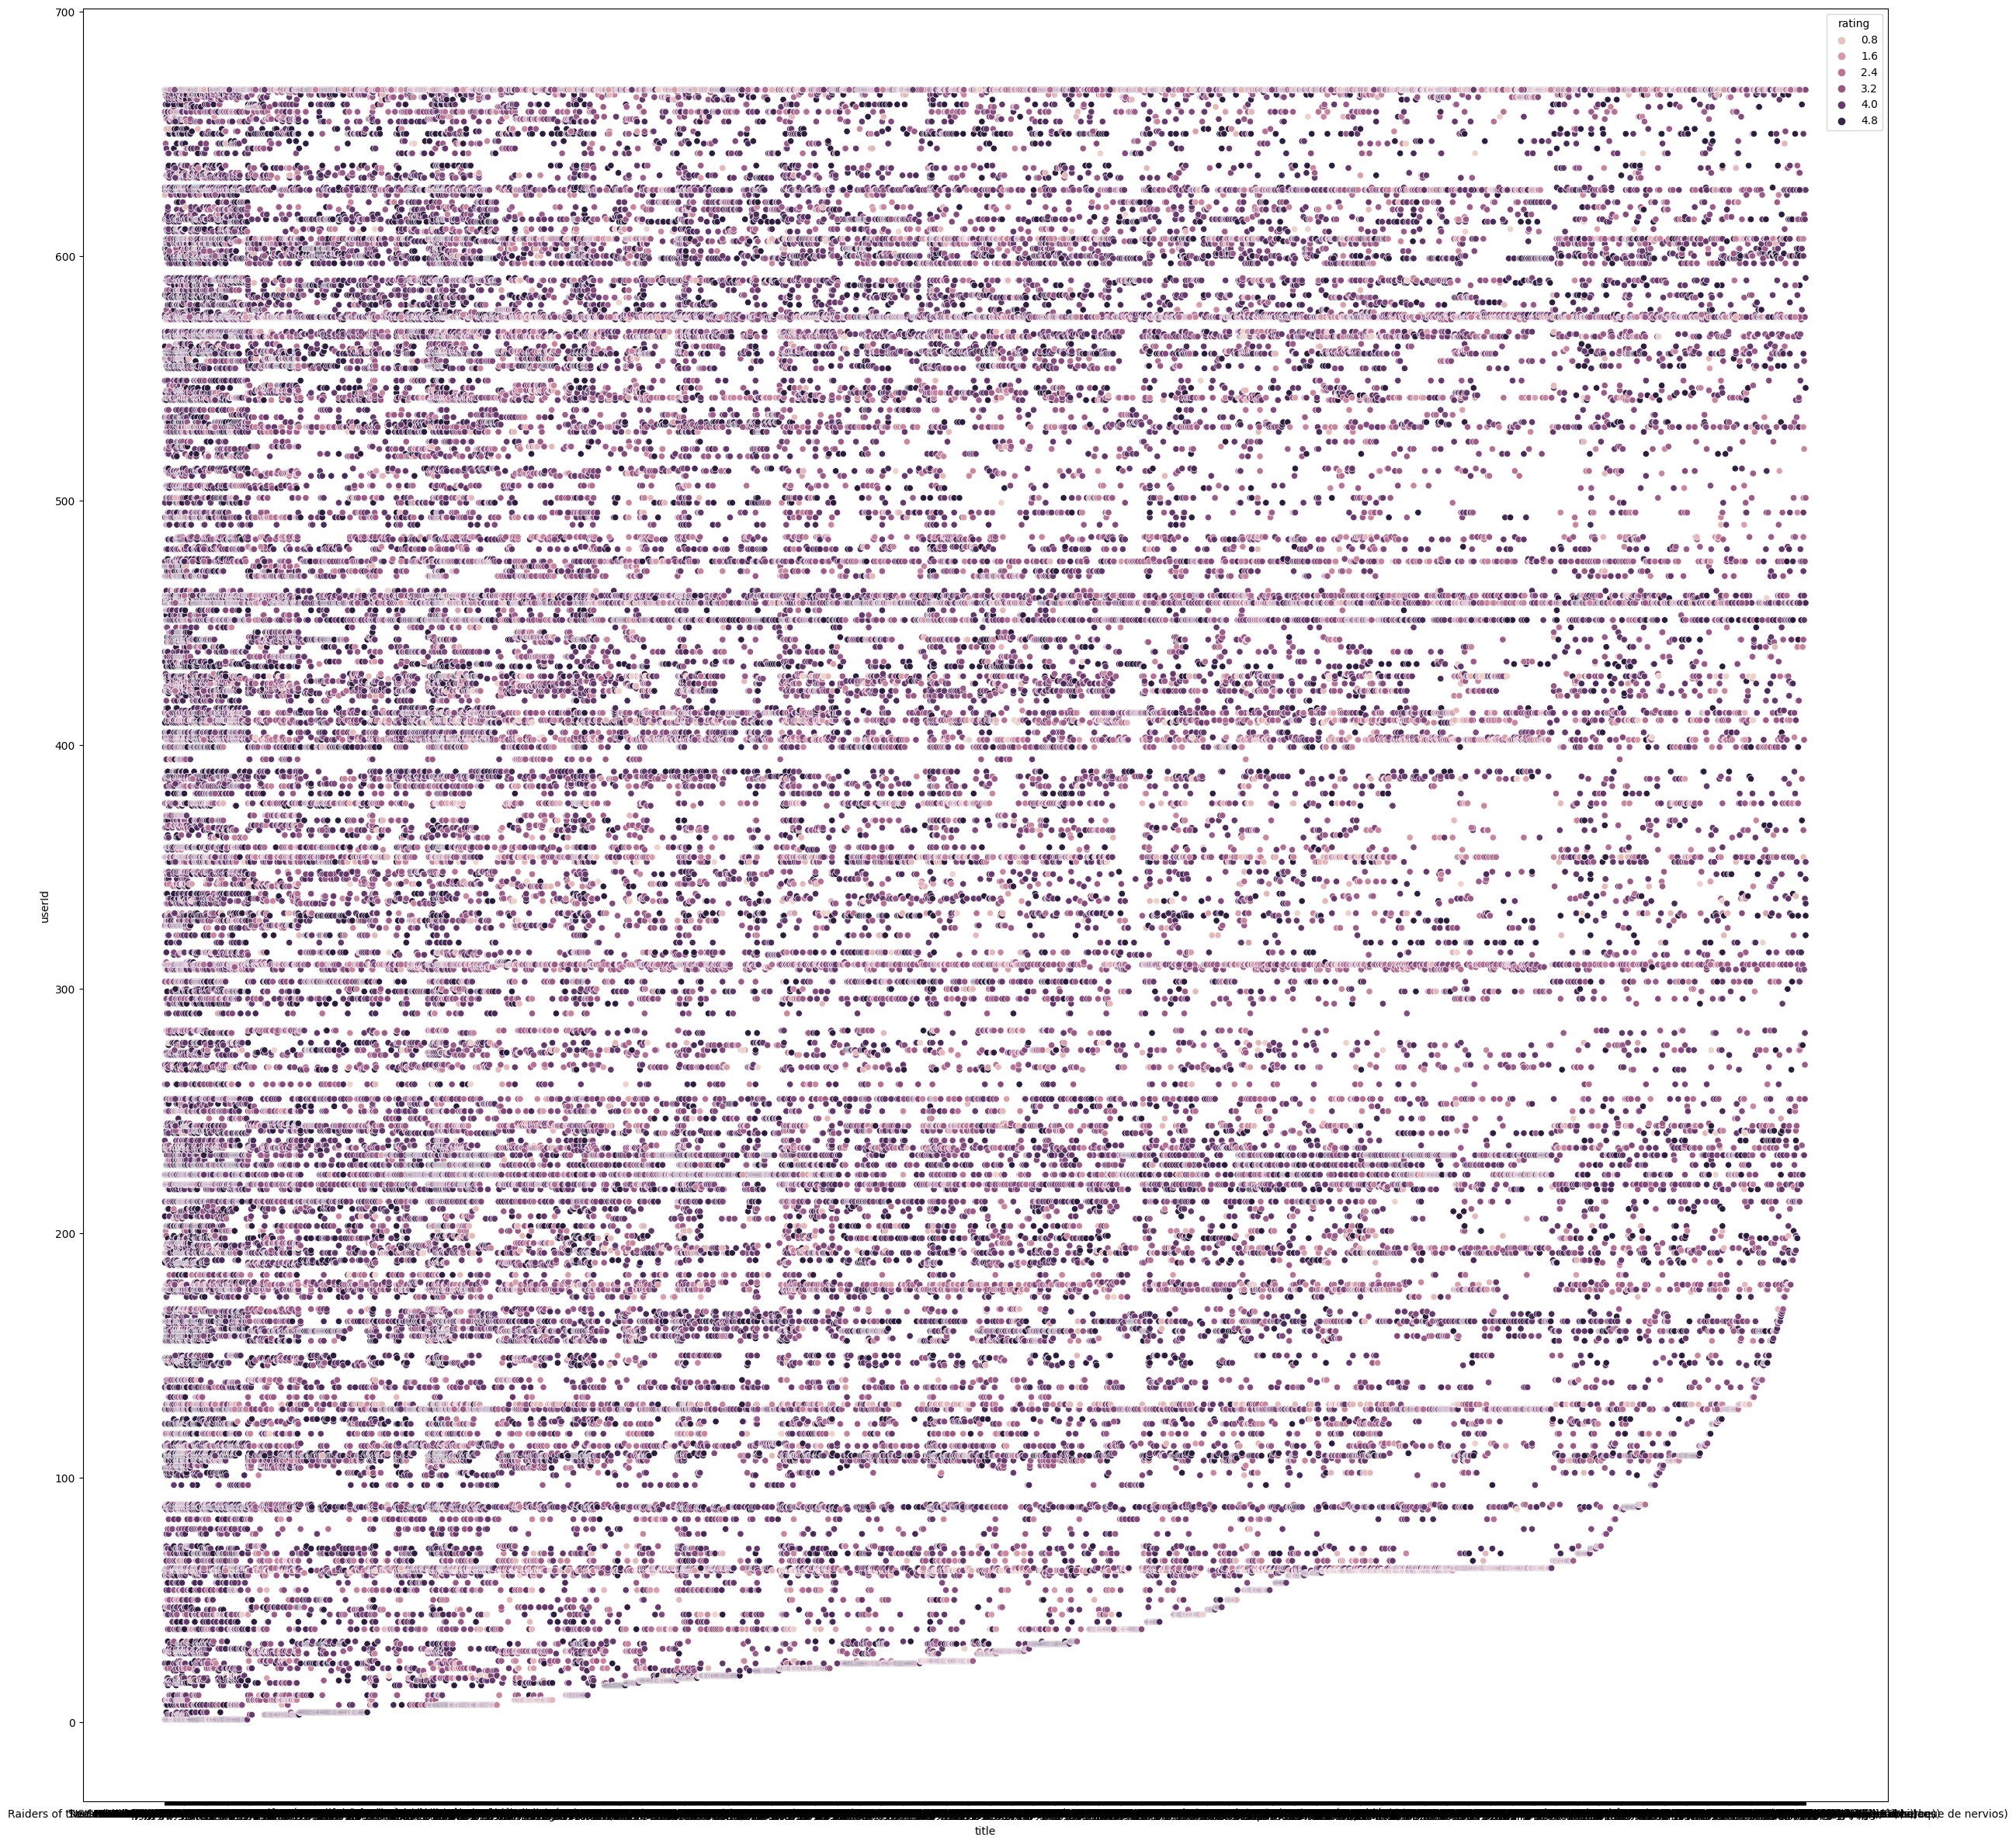

In [278]:
plt.figure(figsize=(30,30))
sns.scatterplot(x=rnew.title,y=rnew.userId,hue=rnew.rating)
plt.show()

In [279]:
pt=rnew.pivot_table(index='title',columns='userId',values='rating')
pt.fillna(0,inplace=True)
pt

userId                      1    3    4    7    9    11   15   16   17   18   \
title                                                                          
'burbs, The                 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
(500) Days of Summer        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
*batteries not included     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10 Things I Hate About You  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
101 Dalmatians              0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0   
...                         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Zombieland                  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  4.0  0.0   
Zoolander                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
eXistenZ                    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
xXx                         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
¡Three Amigos!              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

userId                      ...  656  657  659  661  662  664  665  666  667  \
title                       ...                                                
'burbs, The                 ...  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
(500) Days of Summer        ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
*batteries not included     ...  0.0  1.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10 Things I Hate About You  ...  0.0  0.0  2.5  0.0  0.0  0.0  0.0  4.0  0.0   
101 Dalmatians              ...  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Zombieland                  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Zoolander                   ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
eXistenZ                    ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0   
xXx                         ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
¡Three Amigos!              ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

userId                      668  
title                            
'burbs, The                 0.0  
(500) Days of Summer        2.0  
*batteries not included     0.0  
10 Things I Hate About You  2.0  
101 Dalmatians              2.0  
...                         ...  
Zombieland                  2.5  
Zoolander                   2.5  
eXistenZ                    2.0  
xXx                         3.5  
¡Three Amigos!              2.0  

[2190 rows x 334 columns]

In [280]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2190 entries, 'burbs, The to ¡Three Amigos!
Columns: 334 entries, 1 to 668
dtypes: float64(334)
memory usage: 5.6+ MB


In [281]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores=cosine_similarity(pt)

In [282]:
def recommend(mname):
    index=np.where(pt.index==mname)[0][0]
    distances=similarity_scores[index]
    similarity_items=sorted(list(enumerate(distances)),key=lambda x:x[1],reverse=True)[1:11]
    for i in similarity_items:
        print(pt.index[i[0]])

In [283]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [284]:
pt_matrix=csr_matrix(pt.values)
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(pt_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [285]:
def recommend1(mname):
    index=np.where(pt.index==mname)[0][0]
    distances,indices=model_knn.kneighbors(pt.iloc[index,:].values.reshape(1,-1),n_neighbors=11)
    movie=[]
    distance=[]
    movgen=[]
    for i in range(0,len(distances.flatten())):
        if(i!=0):
            movie.append(pt.index[indices.flatten()[i]])
            distance.append(distances.flatten()[i])
    for i,j in zip(movie,distance):
        movgen_t=[]
        print("Movies: ",i,", Distance: ",j)
        temp_df=mr[mr['title']==i]
        movgen_t.append(i)
        movgen_t.extend(list(temp_df.drop_duplicates('title')['genres'].values))
        movgen.append(movgen_t)
    return movgen
        
        

In [286]:
recommend1('Harry Potter and the Half-Blood Prince')

Movies:  Harry Potter and the Order of the Phoenix , Distance:  0.2764619699391895
Movies:  Harry Potter and the Deathly Hallows: Part 1 , Distance:  0.30174052389190764
Movies:  Harry Potter and the Deathly Hallows: Part 2 , Distance:  0.32925552362507604
Movies:  Harry Potter and the Prisoner of Azkaban , Distance:  0.37278652866692685
Movies:  Harry Potter and the Goblet of Fire , Distance:  0.4032692416446674
Movies:  In Time , Distance:  0.4780779985908442
Movies:  Inception , Distance:  0.485908029298337
Movies:  Guardians of the Galaxy , Distance:  0.5066026479826841
Movies:  Hobbit: An Unexpected Journey, The , Distance:  0.5080390855746305
Movies:  Hunger Games: Catching Fire, The , Distance:  0.5176402850011652


[['Harry Potter and the Order of the Phoenix', 'Adventure|Drama|Fantasy|IMAX'],
 ['Harry Potter and the Deathly Hallows: Part 1',
  'Action|Adventure|Fantasy|IMAX'],
 ['Harry Potter and the Deathly Hallows: Part 2',
  'Action|Adventure|Drama|Fantasy|Mystery|IMAX'],
 ['Harry Potter and the Prisoner of Azkaban', 'Adventure|Fantasy|IMAX'],
 ['Harry Potter and the Goblet of Fire', 'Adventure|Fantasy|Thriller|IMAX'],
 ['In Time', 'Crime|Sci-Fi|Thriller'],
 ['Inception', 'Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX'],
 ['Guardians of the Galaxy', 'Action|Adventure|Sci-Fi'],
 ['Hobbit: An Unexpected Journey, The', 'Adventure|Fantasy|IMAX'],
 ['Hunger Games: Catching Fire, The', 'Action|Adventure|Sci-Fi|IMAX']]

In [287]:
recommend('Harry Potter and the Half-Blood Prince')

Harry Potter and the Order of the Phoenix
Harry Potter and the Deathly Hallows: Part 1
Harry Potter and the Deathly Hallows: Part 2
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
In Time
Inception
Guardians of the Galaxy
Hobbit: An Unexpected Journey, The
Hunger Games: Catching Fire, The


In [288]:
import pickle
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(model_knn,open('model_knn.pkl','wb'))
pickle.dump(mr,open('mr.pkl','wb'))